# Laboratorio 5 Data Science
### Ricardo Valenzuela - 18762
### Diego Solorzano - 18151

Al igual que en el laboratorio se estara utilizando el ejemplo realizado en clase con el fin de responder las preguntas planteadas en el laboratorio.

In [111]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.6.0'

## Generando datos

In [112]:
# Variable a ser modificada en el lab
observaciones =  1000 #100000

x1 = np.random.uniform(low=-10, high=10, size=(observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

entradas_generadas = np.column_stack((x1,x2))

## Generar las metas a las que queremos apuntar

In [113]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

targets_generados = 2 * x1 - 3 * x2 + 5 + ruido

In [114]:
np.savez('Datos_TF', entradas = entradas_generadas, targets = targets_generados)

## Resolver con TensorFlow

In [115]:
datos_entrenamiento = np.load('Datos_TF.npz')

In [116]:
tamanio_entrada = 2   # el número de variables que tenemos

tamanio_salida = 1   # el número de salidas que tenemos

In [117]:
model = tf.keras.Sequential([
                           
                            tf.keras.layers.Dense(tamanio_salida,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

In [118]:
#Aqui se modifica la tasa de aprendizaje
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate=0.02)

In [119]:
#Aqui se modifica el optimizador de perdida
model.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')

In [120]:
model.fit(datos_entrenamiento['entradas'], datos_entrenamiento['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 23.7991
Epoch 2/100
32/32 - 0s - loss: 1.1142
Epoch 3/100
32/32 - 0s - loss: 0.4286
Epoch 4/100
32/32 - 0s - loss: 0.3723
Epoch 5/100
32/32 - 0s - loss: 0.3468
Epoch 6/100
32/32 - 0s - loss: 0.3560
Epoch 7/100
32/32 - 0s - loss: 0.3882
Epoch 8/100
32/32 - 0s - loss: 0.3888
Epoch 9/100
32/32 - 0s - loss: 0.3726
Epoch 10/100
32/32 - 0s - loss: 0.3592
Epoch 11/100
32/32 - 0s - loss: 0.3538
Epoch 12/100
32/32 - 0s - loss: 0.4091
Epoch 13/100
32/32 - 0s - loss: 0.3700
Epoch 14/100
32/32 - 0s - loss: 0.3903
Epoch 15/100
32/32 - 0s - loss: 0.3718
Epoch 16/100
32/32 - 0s - loss: 0.3704
Epoch 17/100
32/32 - 0s - loss: 0.3611
Epoch 18/100
32/32 - 0s - loss: 0.3586
Epoch 19/100
32/32 - 0s - loss: 0.3849
Epoch 20/100
32/32 - 0s - loss: 0.3566
Epoch 21/100
32/32 - 0s - loss: 0.3785
Epoch 22/100
32/32 - 0s - loss: 0.3804
Epoch 23/100
32/32 - 0s - loss: 0.3499
Epoch 24/100
32/32 - 0s - loss: 0.3852
Epoch 25/100
32/32 - 0s - loss: 0.3672
Epoch 26/100
32/32 - 0s - loss: 0

## Extraccion de pesos y sesgos

In [121]:
model.layers[0].get_weights()    # el cero (0) es porque solo tenemos una capa

[array([[ 1.9846694],
        [-3.0300782]], dtype=float32), array([5.0151396], dtype=float32)]

In [122]:
pesos = model.layers[0].get_weights()[0]
pesos

array([[ 1.9846694],
       [-3.0300782]], dtype=float32)

In [123]:
sesgos = model.layers[0].get_weights()[1]
sesgos

array([5.0151396], dtype=float32)

## Extraccion de salidas y predicciones

In [124]:
model.predict_on_batch(datos_entrenamiento['entradas']).round(1)

array([[  7.1],
       [-24.9],
       [ 48.1],
       [  5.5],
       [ 15. ],
       [-31.2],
       [ -3.4],
       [-16.5],
       [-16.9],
       [ -0.5],
       [-24.5],
       [-19.6],
       [  1.9],
       [-12.3],
       [ 36.3],
       [-33.2],
       [-30.5],
       [-19.7],
       [  4.4],
       [ 26. ],
       [ -0. ],
       [  3.9],
       [  0.5],
       [  9.7],
       [ 26.8],
       [  6. ],
       [ 42.8],
       [  8.3],
       [ -8.8],
       [ -2.1],
       [-17.1],
       [ 19. ],
       [ 13.5],
       [-12.7],
       [ 12. ],
       [ 11. ],
       [-12. ],
       [-29. ],
       [ 36. ],
       [ 15.2],
       [-20.8],
       [ -1.8],
       [ -1.6],
       [-19.5],
       [-16.6],
       [ 24.2],
       [-29.9],
       [ -4.4],
       [ 31. ],
       [ 25.9],
       [-36.4],
       [ 21.8],
       [ 24.1],
       [ -0.2],
       [ 20.9],
       [-23.3],
       [ 22.4],
       [-24. ],
       [ 10. ],
       [-14. ],
       [-33.6],
       [-25. ],
       [

In [125]:
datos_entrenamiento['targets'].round(1)

array([[  7.1],
       [-25.3],
       [ 48.6],
       [  4.8],
       [ 15.5],
       [-32. ],
       [ -4.2],
       [-15.8],
       [-16.9],
       [ -0.2],
       [-25. ],
       [-19.2],
       [  1.3],
       [-11.2],
       [ 37. ],
       [-33.5],
       [-31.2],
       [-18.9],
       [  4.6],
       [ 26.5],
       [ -0.5],
       [  4.3],
       [  1.3],
       [  9.6],
       [ 27.6],
       [  6. ],
       [ 41.9],
       [  9.2],
       [ -9.5],
       [ -2.7],
       [-18.1],
       [ 19. ],
       [ 14.1],
       [-13.5],
       [ 12.7],
       [ 11.1],
       [-11.1],
       [-29.4],
       [ 36.1],
       [ 14.9],
       [-20.6],
       [ -1.5],
       [ -2.4],
       [-19.8],
       [-16.6],
       [ 24.7],
       [-30.1],
       [ -4.1],
       [ 31.7],
       [ 25.9],
       [-36.4],
       [ 21.2],
       [ 24.5],
       [  0.1],
       [ 21.4],
       [-22.7],
       [ 23. ],
       [-23.9],
       [ 10.7],
       [-13.2],
       [-33.3],
       [-24.2],
       [

## Grafica de resultados

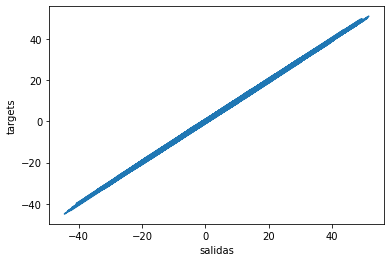

In [126]:
plt.plot(np.squeeze(model.predict_on_batch(datos_entrenamiento['entradas'])), 
         np.squeeze(datos_entrenamiento['targets']))
plt.xlabel('salidas')
plt.ylabel('targets')
plt.show()

In [127]:
fig = px.scatter(x = np.squeeze(model.predict_on_batch(datos_entrenamiento['entradas'])), 
                 y =  np.squeeze(datos_entrenamiento['targets']))

fig.update_layout(
    title="Comparación predicciones vrs metas",
    xaxis_title="Salidas (Predicciones)",
    yaxis_title="Targets (Metas)",
    width = 600,
    height = 400,)

fig.show()

## Preguntas del laboratorio

En clase vimos un modelo simple de una red neuronal utilizando TensorFlow 2.  Utilizando el código desarrollado (o si lo desea uno propio pero que funcione correctamente), responda a las siguientes preguntas: 

### 1. Cambie el número de observaciones a 100,000.  ¿Qué ocurre?

R//:
El unico cambio signifiactivo que pudimos observar fue al momento de entrenar el modelo, con 1000 datos el entrenamiento fue muy rapido (10 a 15 segundos), sin embargo, al aumentar la cantidad de datos a 100,000 el entrenamiento duro muchisimo mas (1 minuto o 2). Lo que pudimos observar es que el tiempo extra sucede en el tiempo que tarda una epoca en completarse.

Por lo demas parece ser muy similar al laboratorio pasado, viendo las graficas solo se puede concluir que estan mas populadas, y en terminos de pesos y sesgos tambien se mantiene bastante similar.

### 2. “Juegue” un poco con la tasa de aprendizaje.  Los valores como 0.0001, 0.001, 0.1, 1 son interesantes para observar ¿Qué diferencias se observan?  ¿Se comporta bien el algoritmo?

#### 0.0001:
Al usar esta taza de aprendize podemos ver que aprimera instancia la perdida no termina de converger a 0, es decir que son necesarias mas epocas para que esto suceda. Con esta taza de aprendizaje y 100 epocas se obtuvo resultados muy similares en los pesos, siendo estos 1.9985338 y -3.007256, que son datos muy cercanos a los esperados 2 y -3. Sin embargo, con el sesgo si miramos una gran diferencia con un valor de 2.357821 muy alejado del 5 esperado.

Las graficas parecen ser bastante adecuadas, ambas presentan una linea inclinada con 45 grados, por lo que podemos determinar que si es un modelo adecuado pero no el mejor.

#### 0.001:
Con esta taza de aprendize podemos ver que la perdida si converge a 0. Con esta taza de aprendizaje se obtuvieron resultados ligeramente mejores que con la taza inicial (0.02), aqui los pesos son de 2.0010862 y -2.9929411 mientras que el sesgo fue de 5.009621, que son valores muy cercanos a los esperados de 2, -3 y 5.
Las graficas tambien son bastante alentadoras, ya que nos muestra la esperada linea inclinada de 45 grados.
Podemos determinar que este es un buen valor para la taza de aprendizaje.

#### 0.1:
Al utilizar esta taza de aprendizaje directamente no obtuvimos resultados, al hacer el proceso de entrenamiento podemos ver que la perdidad de la epoca 1 tendio al infinito, sin embargo, las demas epocas presentan una perdida de NaN. Esto provoco que no tuvieramos datos de salida, pesos y sesgo, por lo que no se pueden graficar los resultados.
En conclusion este no es un buen valor para la taza de aprendizaje ya que la perdida tiende al infinito y no se logran resultados.

#### 1:
Muy similar al caso anterior, sin embargo, aqui desde la primera epoca a la ultima la perdidad tuvo un valor de NaN, por lo que nuevamente no tuvimos datos de salida, pesos y sesgo adecuados. Esto tambien bloqueo la generacion de graficas.

### 3. Cambie la función de pérdida.  Una función altenativa es la “Huber Loss”. ¿Cómo se comparan los resultados al cambiar la función de pérdida?

Referencia:  https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras